# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import requests
import json

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city 
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        #print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": (city_max_temp - 273.15),
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | asenovgrad
Processing Record 3 of Set 1 | ha'il
Processing Record 4 of Set 1 | leo
Processing Record 5 of Set 1 | amursk
Processing Record 6 of Set 1 | manali
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | st. john's
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | turpan
Processing Record 11 of Set 1 | bel ombre
Processing Record 12 of Set 1 | hammerfest
Processing Record 13 of Set 1 | khandyga
Processing Record 14 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 15 of Set 1 | papatowai
Processing Record 16 of Set 1 | dudinka
Processing Record 17 of Set 1 | east london
Processing Record 18 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | coquimbo
Processing Record 21 of Set 1 | hithadhoo
Processing Record 22 o

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data, columns=["City", "Lat", "Lng", "Max Temp", 
                                                "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"])

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,thompson,55.7435,-97.8558,14.09,82,100,4.63,CA,1691532069
1,asenovgrad,42.0167,24.8667,17.84,63,48,0.51,BG,1691532928
2,ha'il,27.5219,41.6907,32.01,15,0,2.06,SA,1691532929
3,leo,11.1000,-2.1000,23.10,92,100,2.36,BF,1691532929
4,amursk,50.2261,136.8994,16.96,63,100,3.73,RU,1691532929


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thompson,55.7435,-97.8558,14.09,82,100,4.63,CA,1691532069
1,asenovgrad,42.0167,24.8667,17.84,63,48,0.51,BG,1691532928
2,ha'il,27.5219,41.6907,32.01,15,0,2.06,SA,1691532929
3,leo,11.1000,-2.1000,23.10,92,100,2.36,BF,1691532929
4,amursk,50.2261,136.8994,16.96,63,100,3.73,RU,1691532929


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

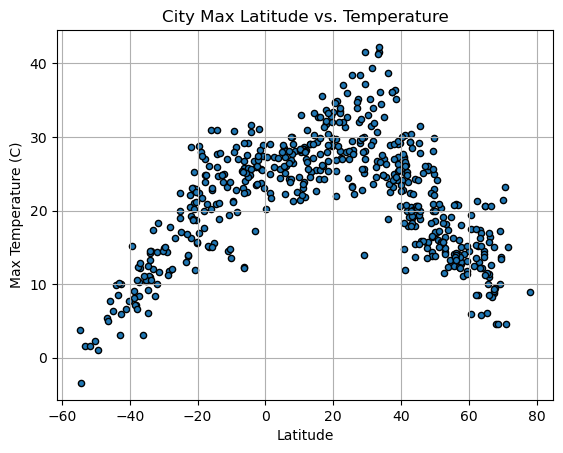

In [8]:
# Build scatter plot for latitude vs. temperature
lat_vs_temp = city_data_df.plot("Lat", "Max Temp", kind="scatter", edgecolor="black", grid=True)

# Incorporate the other graph properties
lat_vs_temp.set_xlabel("Latitude")
lat_vs_temp.set_ylabel("Max Temperature (C)")
lat_vs_temp.set_title("City Max Latitude vs. Temperature")

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

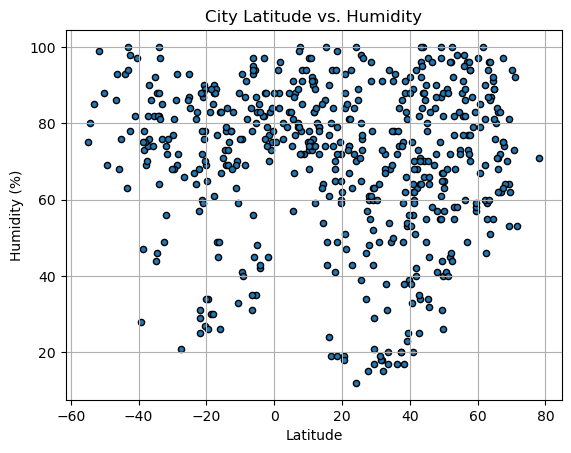

In [9]:
# Build the scatter plots for latitude vs. humidity
lat_vs_humidity = city_data_df.plot("Lat", "Humidity", kind="scatter", edgecolor="black", grid=True)

# Incorporate the other graph properties
lat_vs_humidity.set_xlabel("Latitude")
lat_vs_humidity.set_ylabel("Humidity (%)")
lat_vs_humidity.set_title("City Latitude vs. Humidity")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

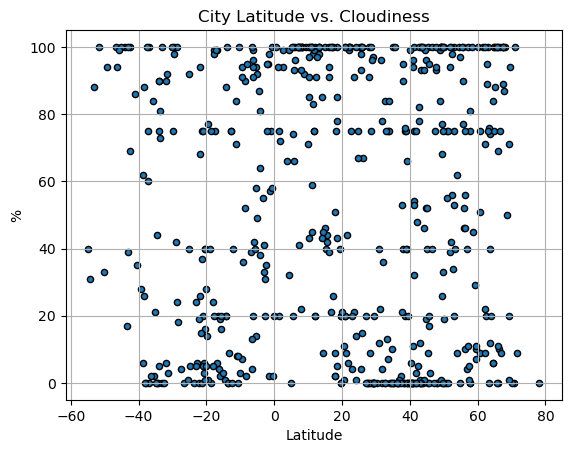

In [10]:
# Build the scatter plots for latitude vs. cloudiness
lat_vs_cloudiness = city_data_df.plot("Lat", "Cloudiness", kind="scatter", edgecolor="black", grid=True)

# Incorporate the other graph properties
lat_vs_cloudiness.set_xlabel("Latitude")
lat_vs_cloudiness.set_ylabel("%")
lat_vs_cloudiness.set_title("City Latitude vs. Cloudiness")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

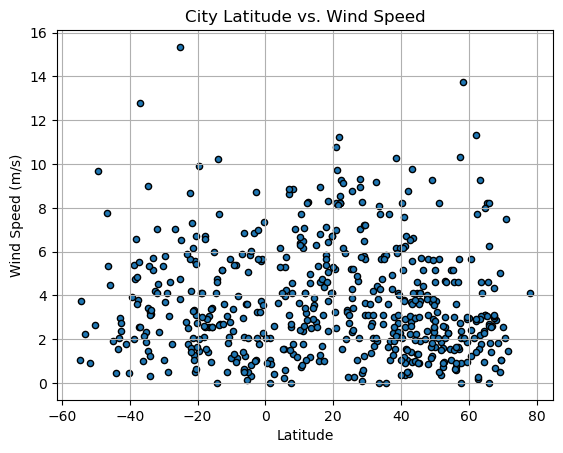

In [11]:
# Build the scatter plots for latitude vs. wind speed
lat_vs_wind_speed = city_data_df.plot("Lat", "Wind Speed", kind="scatter", edgecolor="black", grid=True)

# Incorporate the other graph properties
lat_vs_wind_speed.set_xlabel("Latitude")
lat_vs_wind_speed.set_ylabel("Wind Speed (m/s)")
lat_vs_wind_speed.set_title("City Latitude vs. Wind Speed")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

def create_lin_regress(x, y):
    corr_slope, corr_int, corr_r, corr_p, corr_std_err = st.linregress(x, y)
    corr_fit = x * corr_slope + corr_int

    line_equation = f"y = {round(corr_slope,2)}x + {round(corr_int,2)}"
   
    plt.scatter(x, y)
    plt.plot(x, corr_fit, color="red", label="label")

    plt.annotate(line_equation, xy=((x.min()+10), (y.min()+10)), color="red")
    plt.annotate(f"The r-value is {round(corr_r, 2)}", xy=(x.min(), y.max()), color="black")
    

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,thompson,55.7435,-97.8558,14.09,82,100,4.63,CA,1691532069
1,asenovgrad,42.0167,24.8667,17.84,63,48,0.51,BG,1691532928
2,ha'il,27.5219,41.6907,32.01,15,0,2.06,SA,1691532929
3,leo,11.1000,-2.1000,23.10,92,100,2.36,BF,1691532929
4,amursk,50.2261,136.8994,16.96,63,100,3.73,RU,1691532929


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,port-aux-francais,-49.3500,70.2167,1.05,69,94,9.67,TF,1691532932
8,waitangi,-43.9535,-176.5597,9.90,93,100,0.45,NZ,1691532709
10,bel ombre,-4.6167,55.4167,24.79,85,87,5.84,SC,1691532577
13,papatowai,-46.5619,169.4708,5.45,86,100,7.76,NZ,1691532331
15,east london,-33.0153,27.9116,17.42,76,100,5.15,ZA,1691532432


###  Temperature vs. Latitude Linear Regression Plot

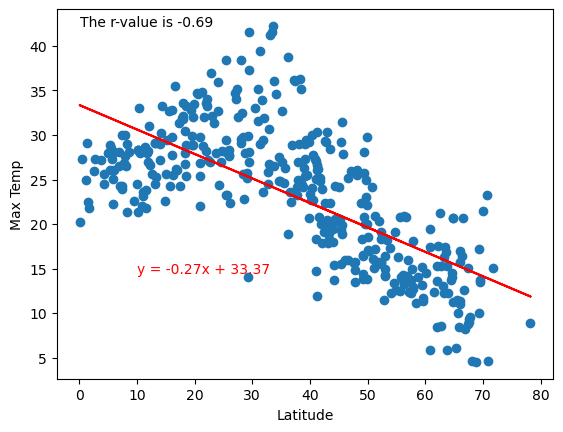

In [15]:
# Linear regression on Northern Hemisphere

create_lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])

plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.show()

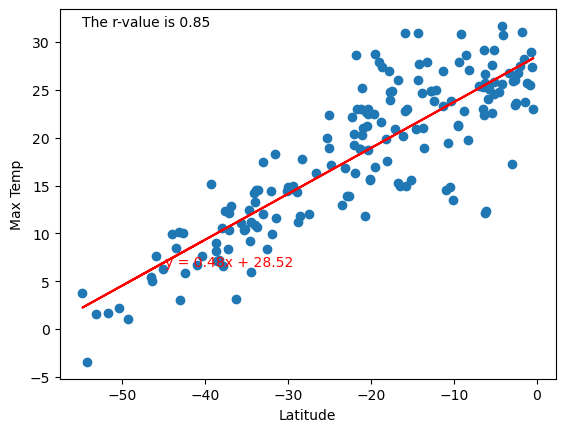

In [16]:
# Linear regression on Southern Hemisphere
create_lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])

plt.xlabel("Latitude")
plt.ylabel("Max Temp")

plt.show()

**Discussion about the linear relationship:** There is a strong correlation between latitude and temperature for both the northern and southern hemispheres. The closer to the equator (latitude of 0), the higher the temperature. The farther away from the equator, the lower the temperature.

### Humidity vs. Latitude Linear Regression Plot

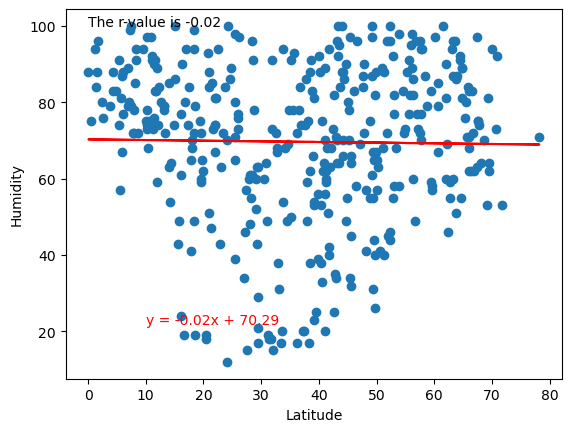

In [17]:
# Northern Hemisphere
create_lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])

plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.show()

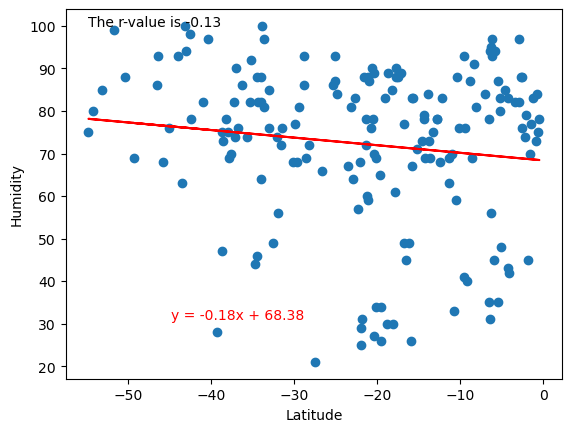

In [18]:
# Southern Hemisphere

create_lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])

plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.show()

**Discussion about the linear relationship:** There is no relationship between latitude and humidity for the northern hemisphere, but a weak correlation for the southern hemispehere where humidity decreases as the latitude approaches the equator. 

### Cloudiness vs. Latitude Linear Regression Plot

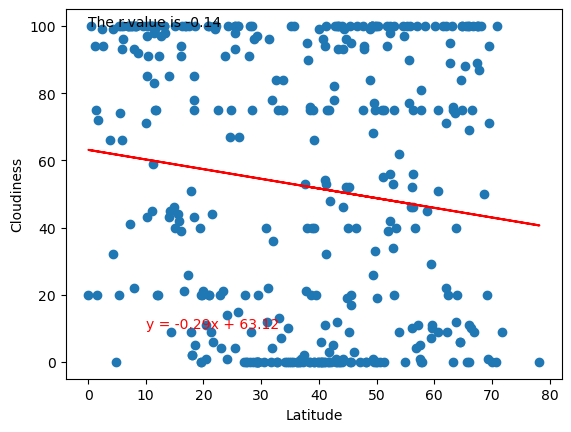

In [19]:
# Northern Hemisphere

create_lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.show()

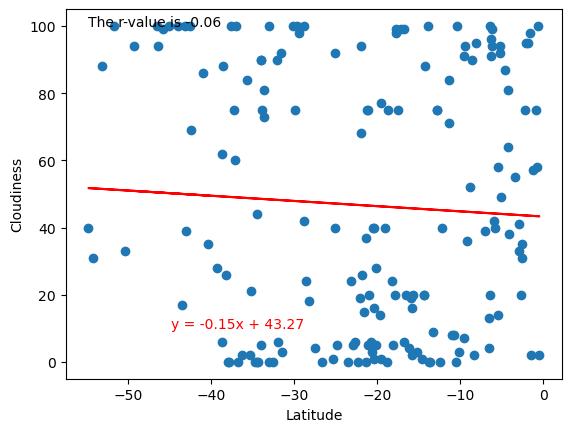

In [20]:
# Southern Hemisphere

create_lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.show()

**Discussion about the linear relationship:** There is a weak correlation between latitude and cloudiness for both the northern and southern hemispheres where the % of cloud covers increases as the latitude approaches the equator.

### Wind Speed vs. Latitude Linear Regression Plot

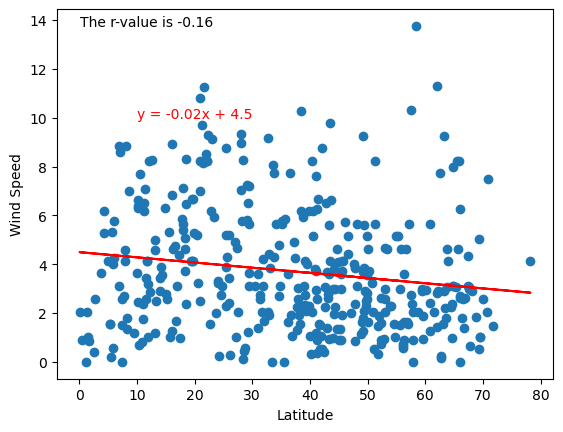

In [21]:
# Northern Hemisphere

create_lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.show()

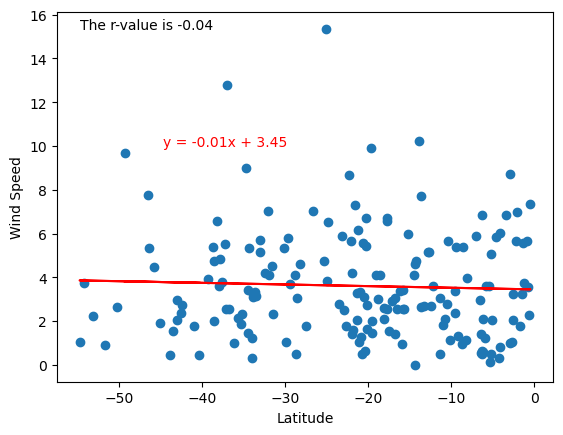

In [22]:
# Southern Hemisphere

create_lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.show()

**Discussion about the linear relationship:** For both hemispheres, there is a weak correlation between latitude and wind speed. For the northern hemisphere, the wind speed increases as the latitude approaches the equator. For the southern hemisphere, wind speed decreases as the latitude approaches the equator.